In [ ]:
!pip install qiskit==1.0.2 matplotlib qiskit_ibm_runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of qiskit-ibm-runtime to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 8.4 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of qiskit-ibm-runtime to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of qiskit-aer to determine which version is compatible with other requirements. This could take a while.
INFO: pip is

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

token = "f62b73fef6000e40b8d6ae3012e31b2489b02d174749984907e94cdc0706bfc765c4223a76e333a9d9e6a9072bd32e0a7caa568e2ac1e5029200d40b3658d0d3"
service = QiskitRuntimeService(channel="ibm_quantum", token=token)
# QiskitRuntimeService.save_account(channel='ibm_quantum', token=token)
backend = service.backend(name="ibm_brisbane")
backend.num_qubits

127

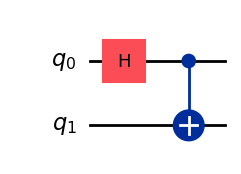

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw(output="mpl")

In [ ]:
from qiskit.quantum_info import Pauli

ZZ = Pauli("ZZ")
ZI = Pauli("ZI")
IZ = Pauli("IZ")
XX = Pauli("XX")
XI = Pauli("XI")
IX = Pauli("IX")

observables = [ZZ, ZI, IZ, XX, XI, IX]

In [ ]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()
job = estimator.run([qc] * len(observables), observables)
job.result()

EstimatorResult(values=array([ 1.        , -0.04101562, -0.04101562,  1.        , -0.015625  ,
       -0.015625  ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.002027025, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000590906, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12977, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9983177185058594, 'simulator_metadata': [{'time_taken': 0.002027025, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.00

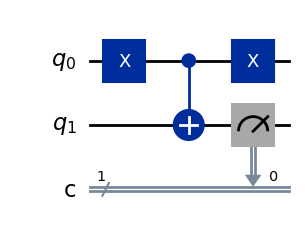

In [ ]:
from qiskit import QuantumCircuit  # , execute
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService

# token='f62b73fef6000e40b8d6ae3012e31b2489b02d174749984907e94cdc0706bfc765c4223a76e333a9d9e6a9072bd32e0a7caa568e2ac1e5029200d40b3658d0d3'
# service = QiskitRuntimeService(channel="ibm_quantum", token=token)
# backend = service.backend(name='ibm_brisbane')

qc = QuantumCircuit(2, 1)
qc.x(0)
qc.cx(0, 1)
qc.x(0)

qc.measure(1, 0)
qc.draw(output="mpl")

# # Use AerSimulator
# simulator = AerSimulator()
# result = simulator.run(qc, shots=10).result()

# # # Use real hardware
# # job = backend.run(qc, shots=8)

# # Get measurement counts
# counts = result.get_counts()
# print(counts)

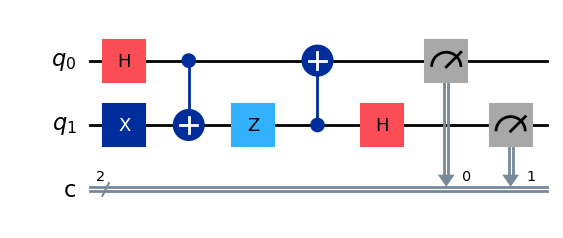

In [ ]:
from qiskit import QuantumCircuit  # , execute
from qiskit_ibm_runtime import QiskitRuntimeService

# token='f62b73fef6000e40b8d6ae3012e31b2489b02d174749984907e94cdc0706bfc765c4223a76e333a9d9e6a9072bd32e0a7caa568e2ac1e5029200d40b3658d0d3'
# service = QiskitRuntimeService(channel="ibm_quantum", token=token)
# backend = service.backend(name='ibm_brisbane')

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)
qc.z(1)
qc.cx(1, 0)
qc.h(1)

qc.measure(0, 0)
qc.measure(1, 1)
qc.draw(output="mpl")

In [ ]:
simulator = AerSimulator()
result = simulator.run(qc, shots=100).result()
result.get_counts()

{'11': 100}

In [ ]:
import numpy as np

x = np.asarray([5 / 13, 12 / 13])
y = [12 / 13, -5 / 13]
x @ y

0.0

In [ ]:
from scipy import stats

stats.norminv